## Analyzing the Data on the Stroop Effect

The purpose of this project is to analyze data on the stroop effect. The sample data is take from a group of particiapants who took  part in a Stroop task. In this task paticpants are given two lists of words. The words in each list are displayed in a certain color of ink. One list has the color of the ink matching the word (ex. green ink for the word "green"), the other list has the color of the ink not matching the word (ex. red ink for the word "yellow"). The matching and non-matching lists are refered to as congruent and incongruent, respectively. The participants are instructed to say the color of the ink for each word in a list out loud, and record their times. They do this for both lists. 

The goal of this analysis is to determine if there is a statistically significant difference between the two groups.

## Questions for Investigation

#### What is the indepdent variable? What is the dependent variable?
* The Independent Variable: The list type- congruent or incongruent
* The dependent variable: The time it takes to read out the colors on the list

#### What is the appropriate hypothesis set?
* Null Hypothesis:  The time to complete both types of lists will not differ
* Alternate Hypothesis: There will be a time difference between the completetion of each list type

#### What kind of statistical test will be performed? And why?
* A two tailed paired t-test will be performed
* The data is on the same groups taking different tests. This scenario fits perfectly with a paired t-test, as it is designed to compare the same samples
* A two-tailed version of the t-test was chosen as it is unknown whether or not the outcome will come will be a faster or slower completeion

## Programmatic Analysis and Descriptive Statistics on the Data

In [1]:
# modules needed for working with  the data
import pandas as pd
import numpy as np
from datetime import date
import math
import scipy.stats

# modules for the visualization
import matplotlib.pyplot as plt
import seaborn as sns

# added to show plots in the notebook
%matplotlib inline

In [2]:
filename = "stroopdata.csv"
stroop_data_df = pd.read_csv(filename)

stroop_data_df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


After a cursory inspection it appears that there will be a significant difference between completetion time the two types of list. However, it is too early on to say this conclusively.

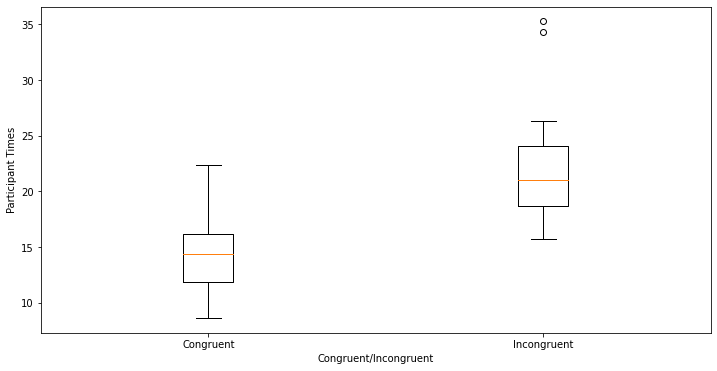

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
# Plots both test types based on time to complete
plt.figure(figsize=(12, 6))
plt.boxplot(stroop_data_df)
plt.xticks([1,2], ["Congruent", "Incongruent"])
plt.xlabel("Congruent/Incongruent")
plt.ylabel("Participant Times")
plt.show()
stroop_data_df.head()

The boxplot above illustrates the difference that was found in the initial ".decribe()" findings. The interquartile range of both groups are quite different. The first 75% of the congruent times were roughly as fast or faster than the minimum time of the incongruent test.

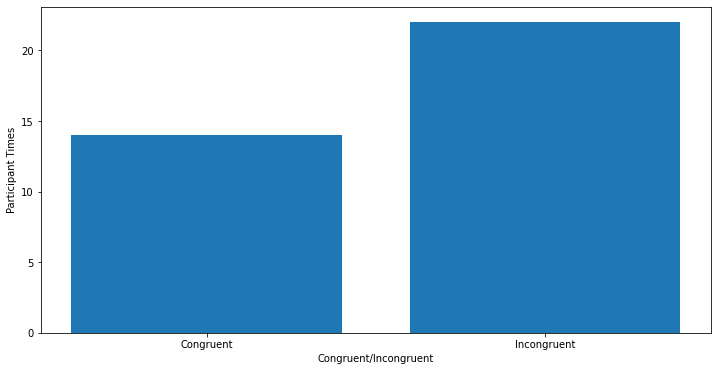

In [4]:
# Formats a new dataframe for easier use in a box plot
cong_stroop_mean = int(stroop_data_df['Congruent'].mean())
incong_stroop_mean = int(stroop_data_df['Incongruent'].mean())
mean_stroop_df = pd.DataFrame()
mean_stroop_df['Averages'] = [cong_stroop_mean, incong_stroop_mean]

# Plots the mean of both test type times
plt.figure(figsize=(12, 6))
plt.bar(mean_stroop_df.index, mean_stroop_df['Averages'])
plt.xticks([0,1], ["Congruent", "Incongruent"])
plt.xlabel("Congruent/Incongruent")
plt.ylabel("Participant Times")
plt.show()

This boxplot shows a large difference in the means of both tests. This further illustrates the earlier inference that the treatment produces a time difference.

## Statistical Testing

#### Confidence level and critical statistical value
* Confidence level: 0.95 - this gives a 95% chance of the null being right, and a 5% chance of it being wrong. Since 5% is classified as a low change, if the analysis shows that the t-stat is in the 5% area, it is beyond normal random chance.
* Critical statical value - According to the t-table (https://people.richland.edu/james/lecture/m170/tbl-t.html) the critical stat value for a df of 23 and a confience level of 95% is +/- 2.069. This will be verified using the scipy ppf function below.

In [5]:
# Formats a "Reject the Null" or "Faill to Reject the Null" output based on the statistical findings
def fail_to_or_reject(crit_stat_val, t_stat):
    if abs(t_stat) > abs(crit_stat_val):
        return "The t-stat is beyond the t-critical value. Reject the Null"
    else:
        return "The t-stat is not beyond the t-critical value. Fail to reject the null"

# Adds a Difference column populated by the difference between the Congruent and Incongruent columns
stroop_data_df['Difference'] = stroop_data_df['Congruent'] - stroop_data_df['Incongruent']

# Calculates the sample size
length = stroop_data_df['Difference'].count()
print(f"The number of participants is {length}.")

# Calculates the degree of freedom
deg_free = stroop_data_df['Difference'].count() - 1
print(f"The degree of freedom is {deg_free}.")

# Caluclates the total mean difference between the two samples
diff_mean = (stroop_data_df['Difference'].mean())
print(f"The mean of the differences is {diff_mean}.")

#Calculates the standard deviation for the differences of each group
stroop_data_df['Stddev'] = ((stroop_data_df['Difference'] - diff_mean) ** 2)
df_stddev = math.sqrt((stroop_data_df['Stddev'].sum())/24)
print(f"The standard deviation of the samples is {df_stddev}")

# Takes the difference of the means, divides by the std.dev divided by the square root of the number of participants
t_stat = diff_mean/(df_stddev/(math.sqrt(length)))
print(f"The t-stat is {t_stat}")

# calculates the t-crtitcal values
crit_stat_value = scipy.stats.t.ppf(q=1-.05/2,df=(deg_free))
print(f"The t-critical vales are +/- {crit_stat_value}.")

# Prints the conclusion
print(fail_to_or_reject(crit_stat_value, t_stat))

The number of participants is 24.
The degree of freedom is 23.
The mean of the differences is -7.964791666666664.
The standard deviation of the samples is 4.762398030222157
The t-stat is -8.193215000970776
The t-critical vales are +/- 2.0686576104190406.
The t-stat is beyond the t-critical value. Reject the Null


## Conclusion

The null has to be rejected as the t-stat into the t-critical area (it actually went quite a a lot further than the t-critical boundry, indicatiing a strong response to the treatment). This conclusion went along with my starting assumption. I have done this test before, and have seen similar results.